In [29]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, asin, acos, atan
%reload_ext autoreload
%autoreload 2
import json
import math
import timeit


In [13]:
with open('../output/tag_location.json') as data_file:    
    data = json.load(data_file)
with open('../output/tag_location.json') as data_file:        
    data_measured = json.load(data_file)
with open('../output/location.json') as data_file:
    location = json.load(data_file)


In [320]:
with open('../5-30-measurement/10/result.json') as data_file:
    data = json.load(data_file)
with open('../output/tag_location.json') as data_file:    
    locations = json.load(data_file)
    
idlist = []
dislist = []
for number in range(0, len(data[0])):
    for i in range(0, len(data[0][number]['tagid'])):
        idlist.append(data[0][number]['tagid'][i]['id'])
for number in range(0, len(data[0])):
    for i in range(0, len(data[0][number]['tagid'])):
        dislist.append(data[0][number]['tagid'][i]['distance'])

tag_sorted = locations
mapping = dict((x[0], x[1:])for x in locations)
tag_sorted[:] = [[x,] + mapping[x] for x in idlist]
tag_sorted

[[38, 1.914, 7.102, 1.75],
 [40, 2.615, 7.102, 1.75],
 [50, 2.337, 7.102, 1.327],
 [134, 7.355, 3.15, 1.75],
 [132, 7.355, 1.119, 1.75],
 [130, 4.861, 0, 1.75],
 [74, 7.355, 2.944, 1.381],
 [78, 7.355, 2.991, 1.265],
 [80, 4.337, 0, 1.336],
 [108, 0, 4.899, 1.75],
 [110, 0, 4.361, 1.75],
 [114, 0, 3.685, 1.75],
 [68, 0, 4.583, 1.376],
 [62, 0, 3.921, 1.314]]

In [322]:
data0 = tag_sorted
distance = dislist
distance0 = [1.76659,
 2.0415,
 1.93937,
 6.07278,
 7.08608,
 6.27607,
 6.19034,
 6.06089,
 6.04928,
 1.55935,
 1.77191,
 2.19658,
 1.69199,
 2.06261,0]

for i in range(0,len(distance)):
    distance[i] = math.pow(distance[i],2)
    distance0[i] = math.pow(distance0[i],2)

    
D = np.zeros((len(data0), len(data0)))    
for i in range(0, len(data0)):
    for j in range(0,len(data0)):
        D[i][j] = math.pow((data0[i][1]-data0[j][1]),2)+math.pow((data0[i][2]
                        -data0[j][2]),2)+math.pow((data0[i][3]-data0[j][3]),2)


D = np.vstack([np.c_[D,distance],distance0])


In [324]:
from algorithms import reconstruct_mds, reconstruct_srls
from point_configuration import HeterogenousConfiguration, PointConfiguration, dm_from_edm
points = []
dm = dm_from_edm(D)
print(len(dm))
arrayD = D[len(D)-1]
r2 = arrayD[:-1]

data0 = [[38, 1.914, 7.102, 1.75],
 [40, 2.615, 7.102, 1.75],
 [50, 2.337, 7.102, 1.327],
 [134, 7.355, 3.15, 1.75],
 [132, 7.355, 1.119, 1.75],
 [130, 4.861, 0, 1.75],
 [74, 7.355, 2.944, 1.381],
 [78, 7.355, 2.991, 1.265],
 [80, 4.337, 0, 1.336],
 [108, 0, 4.899, 1.75],
 [110, 0, 4.361, 1.75],
 [114, 0, 3.685, 1.75],
 [68, 0, 4.583, 1.376],
 [62, 0, 3.921, 1.314],[999,1.592,5.276,1.67]]
for i in range(0,len(data0)):
    points.append([data0[i][1],data0[i][2],data0[i][3]])
point = np.asarray(points)
points_original = []
points_mds = []
points_srls = []
start1 = timeit.default_timer()
Xmds = reconstruct_mds(dm, point, False, 'geometric')
stop1 = timeit.default_timer()

start2 = timeit.default_timer()
Xsrls = reconstruct_srls(r2, point, False)
stop2 = timeit.default_timer()

print(stop1-start1)
print(stop2-start2)
points_original=point
points_mds = Xmds
points_srls = Xsrls
print(points_mds[-1])
print(points_srls[-1])
print(points_original[-1])
A = points_srls[-1]
B = points_original[-1]
print(np.linalg.norm([x - y for x, y in zip(A, B)]))
print(np.linalg.norm([x - y for x, y in zip(A, B)])/np.linalg.norm(B))

105
phi(-2.380235230982072)=[[ 933.9300679]], phi(100000.0)=[[-3576.16591537]]
0.0023795860033715144
0.007691945997066796
[ 1.65511068  5.35761891  0.99221699]
[ 1.66168066  5.3426885   1.54931376]
[ 1.592  5.276  1.67 ]
0.154492459202
0.0268289105614


In [307]:
A = [3.6365585 ,  4.22184957 , 1.63623558]
B = [3.644 , 4.201 , 1.67]
np.linalg.norm([x - y for x, y in zip(A, B)])/np.linalg.norm(B)

0.0069533016004120251

<IPython.core.display.Javascript object>


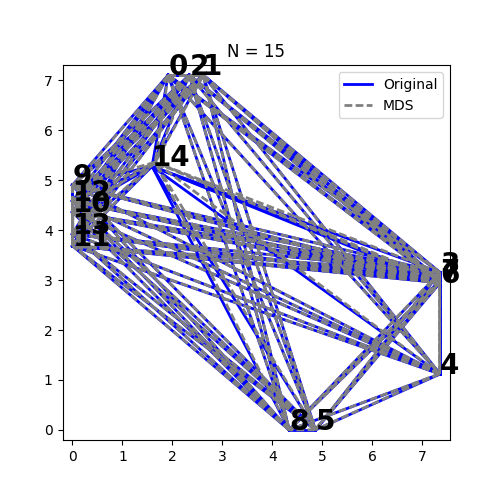

<IPython.core.display.Javascript object>


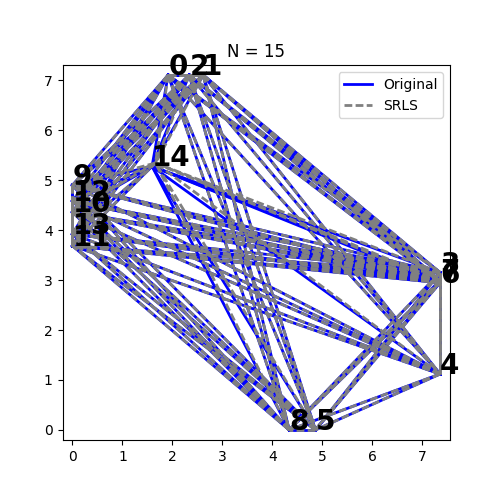

In [325]:
from plots import plot_point_sets
from basics import rmse
%matplotlib notebook
d=3
N = 10
size = [5,5]
pmds = PointConfiguration(N, d)
pmds.points = Xmds
pmds.points = Xsrls
plot_point_sets([points_original,points_mds],size=size, names=('Original', 'MDS'))
plot_point_sets([points_original,points_srls],size=size, names=('Original', 'SRLS'))



<IPython.core.display.Javascript object>


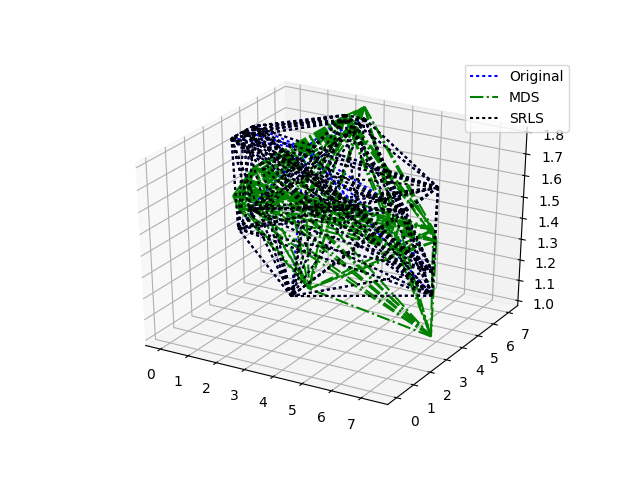

In [326]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import itertools
%matplotlib notebook
plot_points = [points_original,points_mds,points_srls]
cmap = ['b','g','k']
linestyles = [':','-.',':']
names = ['Original','MDS','SRLS']
fig = plt.figure()
ax = fig.gca(projection='3d')
#plt.axis([0,0.3,0,0.3])
N = len(points_mds)
for counter, X in enumerate(plot_points):
    first = True
    for pairs in itertools.combinations(range(N),2):
        x = X[pairs,0]
        y = X[pairs,1]
        z = X[pairs,2]
        if first:
            ax.plot(x, y, z, color=cmap[counter], linestyle=linestyles[counter],label=names[counter])
            first = False
        else:
            ax.plot(x, y, z, color=cmap[counter], linestyle=linestyles[counter])

ax.legend()
plt.show()